In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [5]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [6]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [7]:
!pip install textblob


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', ' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()


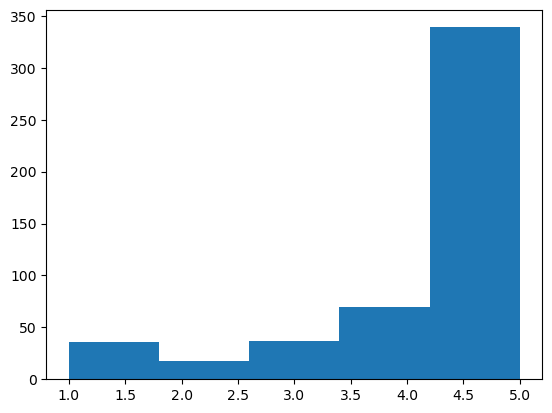

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [3]:
reviews = df

reviews.dropna(inplace=True)

reviews.Score.hist(bins=5 , grid =False)
plt.show()
print(reviews.groupby('Score').count().Id)


In [4]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

In [5]:
reviews_sample= pd.concat([score_1,score_2,score_3,score_4,score_5],axis =0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


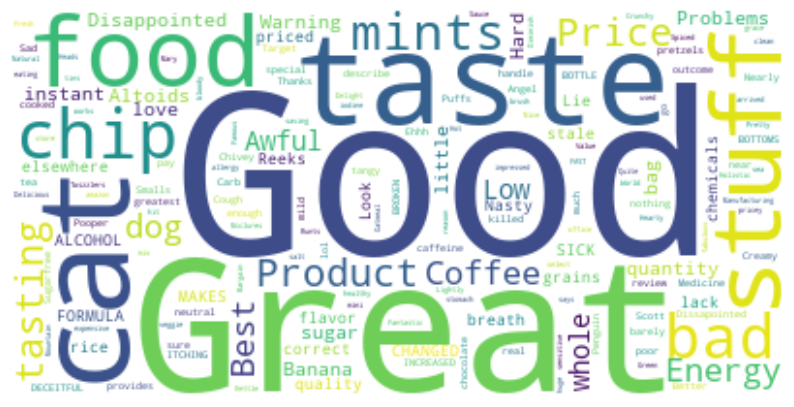

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [3]:
import pandas as pd

# Load your dataset (modify the path accordingly)
reviews_sample = pd.read_csv("Reviews.csv")


In [4]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1, 2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4, 5])]

negative_reviews_str = negative_reviews.Summary.dropna().str.cat(sep=" ")
positive_reviews_str = positive_reviews.Summary.dropna().str.cat(sep=" ")


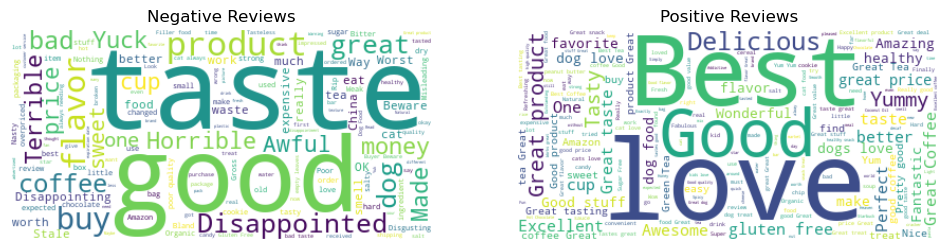

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(wordcloud_negative, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Negative Reviews")
ax[1].imshow(wordcloud_positive, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Positive Reviews")
plt.show()


In [7]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------  122.9/126.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [8]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
cp = sns.color_palette()
analyser = SentimentIntensityAnalyzer()
emptyline = []
for row in df['Text']:
  vs = analyser.polarity_scores(row)
  emptyline.append(vs)
    

In [9]:
df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.085,0.771,0.144,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468


In [10]:
df_c=pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138


In [12]:
df_c["Sentiment"] = np.where(df_c["compound"] >= 0, "Positive", "Negative")
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138,Positive


Sentiment
Positive    453
Negative     47
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

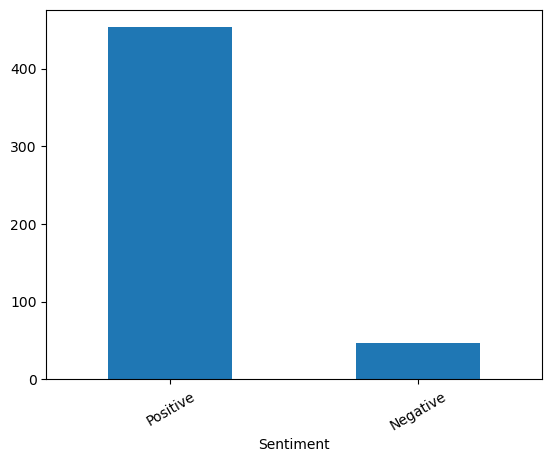

In [13]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=30)